In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('/content/Netflix-Subscriptions.csv')
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [35]:
df.tail()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color,Year
37,2022-07-01,220670000,-0.437647,red,2022
38,2022-10-01,223090000,1.096660,green,2022
39,2023-01-01,230750000,3.433592,red,2023
40,2023-04-01,232500000,0.758397,green,2023
41,2023-07-01,238390000,2.533333,green,2023


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 804.0+ bytes


In [7]:
df['Time Period'] = pd.to_datetime(df['Time Period'], format='%d%m%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Period  42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 804.0 bytes


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Time Period'], y=df['Subscribers'], mode='lines', name='Subscribers'))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth', xaxis_title='Date', yaxis_title='Netflix Subscriptions')
fig.show()

In [12]:
df['Quarterly Growth Rate'] = df['Subscribers'].pct_change() * 100
df[['Subscribers','Quarterly Growth Rate']].head()

,Subscribers,Quarterly Growth Rate
0,34240000,NaN
1,35640000,4.088785
2,38010000,6.649832
3,41430000,8.997632
4,46130000,11.344436


In [16]:
df['Bar Color'] = df['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')
df.head()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color
0,2013-04-01,34240000,NaN,red
1,2013-07-01,35640000,4.088785,green
2,2013-10-01,38010000,6.649832,green
3,2014-01-01,41430000,8.997632,green
4,2014-04-01,46130000,11.344436,green


In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Time Period'],
    y=df['Quarterly Growth Rate'],
    marker_color=df['Bar Color'],
    name='Quarterly Growth Rate',
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate')
fig.show()

In [26]:
df['Year'] = df['Time Period'].dt.year
yearly_growth = df.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100
df['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Year'],
    y=yearly_growth,
    marker_color=df['Bar Color'],
    name='Yearly Growth Rate',
))
fig.update_layout(title='Netflix Yearly Subscribers Growth Rate', xaxis_title='Year', yaxis_title='Yearly Growt Rate (%)')
fig.show()

In [28]:
time_series = df.set_index('Time Period')['Subscribers']
time_series

,Subscribers
Time Period,
2013-04-01,34240000
2013-07-01,35640000
2013-10-01,38010000
2014-01-01,41430000
2014-04-01,46130000
2014-07-01,47990000
2014-10-01,50650000
2015-01-01,54480000
2015-04-01,59620000


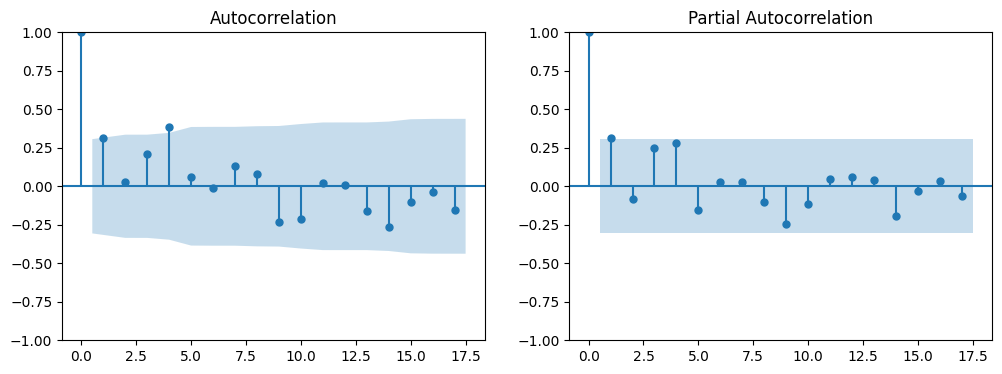

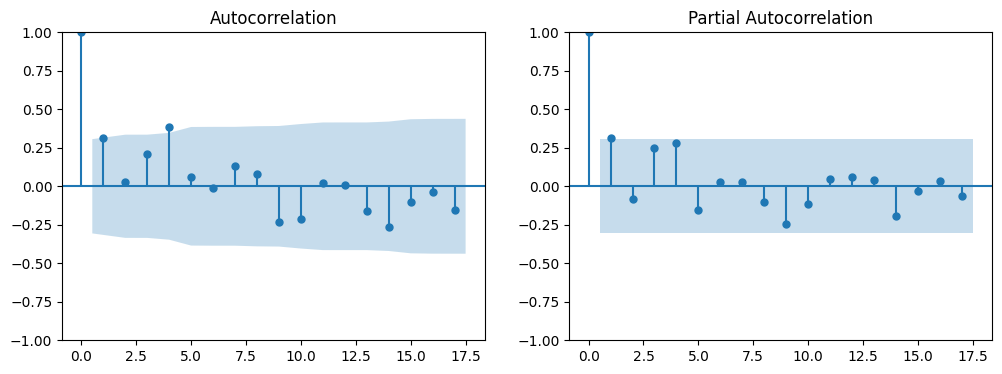

In [33]:
differenced_series = time_series.diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])

In [34]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p,d,q))
results = model.fit()
results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Thu, 24 Jul 2025   AIC                           1351.986
Time:                        09:11:06   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.758      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.000    1.19e+13    1.19e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.96   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.05   Prob(JB):                         0.10
Heteroskedasticity (H):               7.27   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.17e+42. Standard errors may be unstable.
"""

In [37]:
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions.astype(int)

,predicted_mean
2023-10-01,243321447
2024-01-01,248251626
2024-04-01,253180537
2024-07-01,258108180
2024-10-01,263034555


In [41]:
forecast = pd.DataFrame({
    'original': time_series,
    'predictions': predictions
})

fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['original'], mode='lines', name='Original'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast['predictions'], mode='lines', name='Predictions'))
fig.update_layout(title='Netflix Subscribers Forecast', xaxis_title='Time Period', yaxis_title='Subscribers')
fig.show()